In [17]:
import spacy
import random
from spacy import displacy
from sklearn.model_selection import train_test_split

In [18]:
# Chargez le modèle français de Spacy
nlp = spacy.blank("fr")

In [19]:
# Créer un pipeline NER
ner = nlp.add_pipe("ner")

In [20]:
ner.add_label("DEP")
ner.add_label("ARR")

1

In [21]:
DATA = []

with open('inputs.txt', mode="r", encoding="utf-8") as f:
    contents = f.readlines()
    for line in contents:
        DATA.append(eval(line))

# Vous pouvez séparer ces données en deux ensembles de la manière suivante :
X = [text for text, annotations in DATA]
y = [annotations['entities'] for text, annotations in DATA]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print(len(X_train), len(X_test))

1812 453


In [22]:
# Vérifier les offsets des entités dans le jeu de données d'entraînement ajusté
doc = nlp.make_doc(X_train[0])
bilou_tags = spacy.training.offsets_to_biluo_tags(doc, y_train[0])
print(bilou_tags)

['O', 'O', 'O', 'O', 'U-ARR', 'O', 'U-DEP', 'O']


In [23]:
# Débuter l'entraînement
nlp.begin_training()

In [24]:
from spacy.training.example import Example

# Train
histo_loss = []
for itn in range(10):
    losses = {}
    for i in range(len(X_train)):
        # create Example
        doc = nlp.make_doc(X_train[i])
        example = Example.from_dict(doc, {"entities": y_train[i]})
        # Update the model
        nlp.update([example], losses=losses, drop=0.2)
    histo_loss.append(losses['ner'])
    print(losses)

{'ner': 361.34888610944137}
{'ner': 34.64011601410652}
{'ner': 81.37223763761408}
{'ner': 39.8812118680131}
{'ner': 80.42652058239712}
{'ner': 10.340360425328484}
{'ner': 43.09157167558103}
{'ner': 53.80108479923407}
{'ner': 9.652434701335354}
{'ner': 2.8234134510294085e-05}


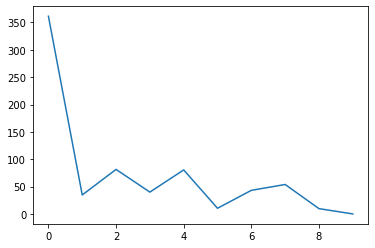

In [25]:
# draw loss
import matplotlib.pyplot as plt
plt.plot(histo_loss)
plt.show()

In [26]:
print(nlp.get_pipe("ner").labels)

('ARR', 'DEP')


In [36]:
# Utiliser le modèle pour détecter des entités
doc = nlp("Demain il faut que je me rende a Paris depuis Marseille")
displacy.render(doc, style="ent", jupyter=True)
doc = nlp("I need to go to Paris from Marseille tomorrow")
displacy.render(doc, style="ent", jupyter=True)

In [28]:
# export model
nlp.to_disk("model_ner")

In [29]:
dep_true = []
dep_pred = []
arr_true = []
arr_pred = []

# predict the test data
for i in range(len(X_test)):
    doc = nlp(X_test[i])
    
    for ent in doc.ents:
        if ent.label_ == 'DEP':
            dep_pred.append(ent.text)
        if ent.label_ == 'ARR':
            arr_pred.append(ent.text)

    arr_true.append(X_test[i][y_test[i][0][0]:y_test[i][0][1]])
    dep_true.append(X_test[i][y_test[i][1][0]:y_test[i][1][1]])

In [30]:
from sklearn.metrics import accuracy_score

#accuracy of DEP
print('dep accuracy', accuracy_score(dep_true, dep_pred)*100, '%')

#accuracy of ARR
print('arr accuracy', accuracy_score(arr_true, arr_pred)*100, '%')

dep accuracy 100.0 %
arr accuracy 100.0 %
